In [6]:
import pandas as pd

# Load the training and testing data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [7]:
# Select relevant features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Handle missing values by filling them with the median value
train_df[features] = train_df[features].fillna(train_df[features].median())


In [8]:
from sklearn.model_selection import train_test_split

# Extract features and target variable
X = train_df[features]
y = train_df[target]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
rmse = mse ** 0.5


In [21]:
# Preprocess the test data
test_df[features] = test_df[features].fillna(test_df[features].median())

# Extract features from the test data
X_test = test_df[features]

# Make predictions on the test data
test_predictions = model.predict(X_test)

# Add predictions to the test dataframe
test_df['SalePrice'] = test_predictions


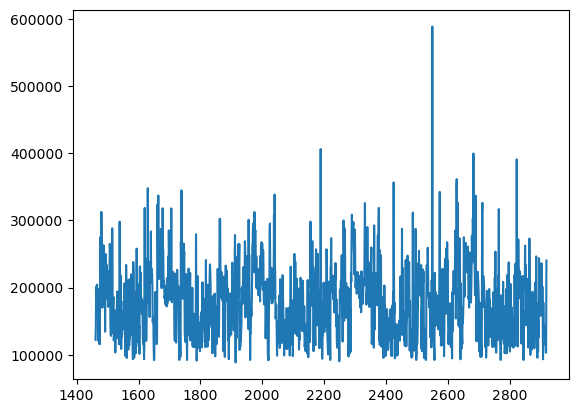

In [25]:
# Select relevant columns for output
output_df = test_df[['Id', 'SalePrice']]

# Save the predictions to a CSV file
output_path = 'test_predictions.csv'
output_df.to_csv(output_path, index=False)
plt.plot(output_df['Id'], output_df['SalePrice'])
plt.show()